In [40]:
import pandas as pd
import ast
df = pd.read_csv('streamlit_app/datasets/raw/films.csv')


In [36]:
df. describe()

,Unnamed: 0,id,popularity,vote_average,decennie,startYear,runtimeMinutes
count,10973.000000,1.097300e+04,10973.000000,10973.000000,10973.000000,10973.000000,10973.000000
mean,5486.000000,5.076505e+05,5.290837,5.359077,2007.741730,2011.654698,98.860567
std,3167.776586,4.208062e+05,23.366807,1.989143,13.101166,12.673055,17.666248
min,0.000000,2.400000e+01,0.600000,0.000000,1980.000000,1980.000000,45.000000
25%,2743.000000,8.205000e+04,1.022000,4.973000,2000.000000,2004.000000,89.000000
50%,5486.000000,4.269730e+05,1.897300,5.811000,2010.000000,2016.000000,97.000000
75%,8229.000000,9.083270e+05,4.814000,6.559000,2020.000000,2022.000000,106.000000
max,10972.000000,1.491034e+06,1170.178000,10.000000,2020.000000,2026.000000,247.000000


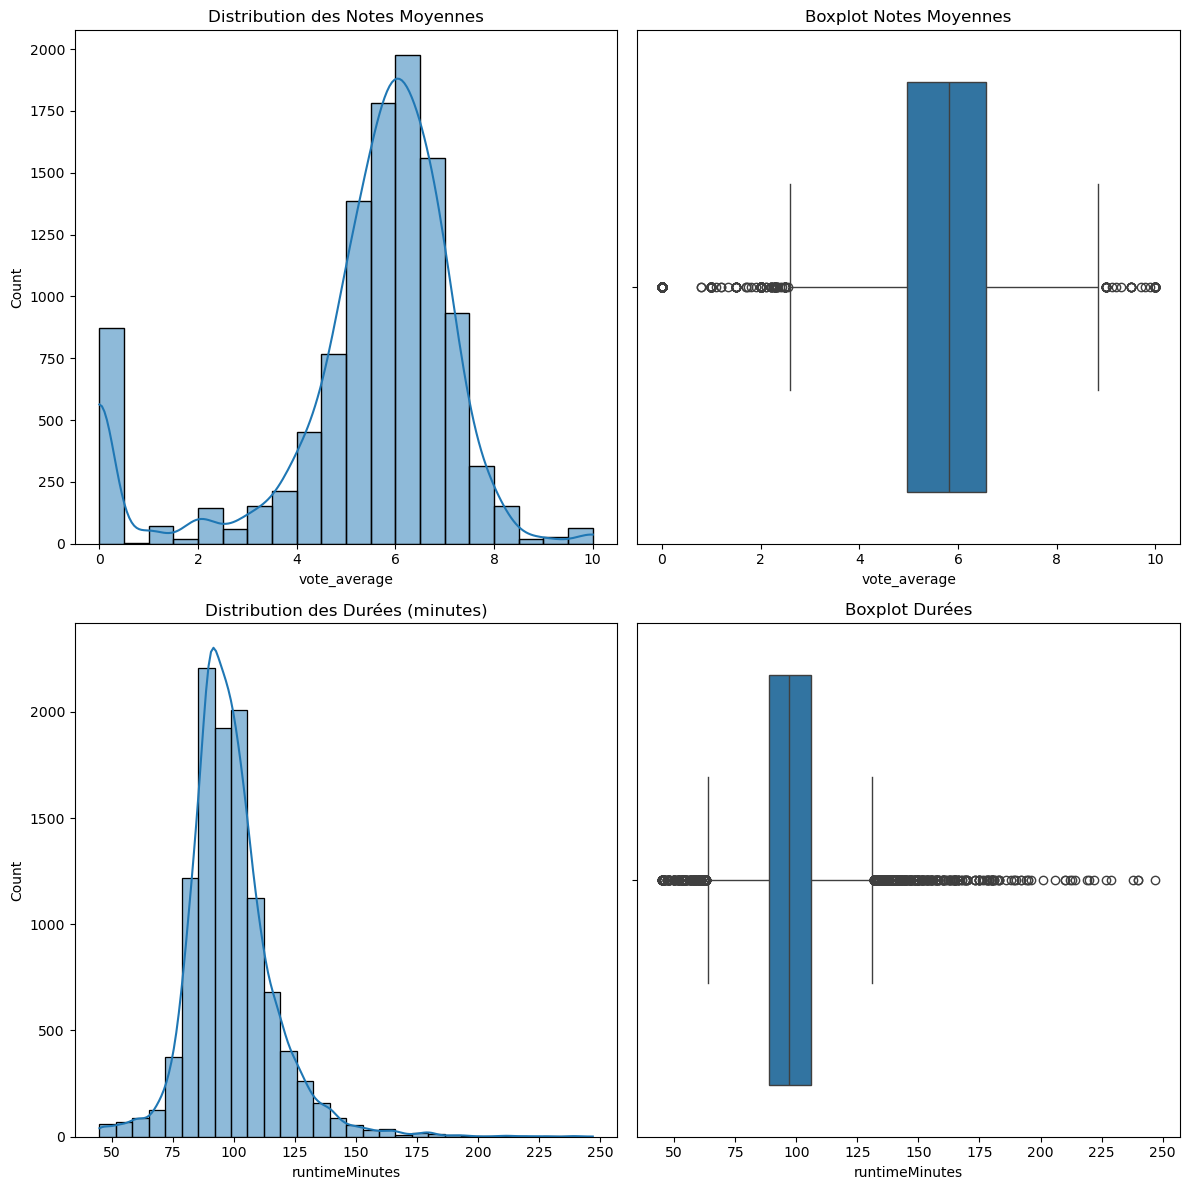

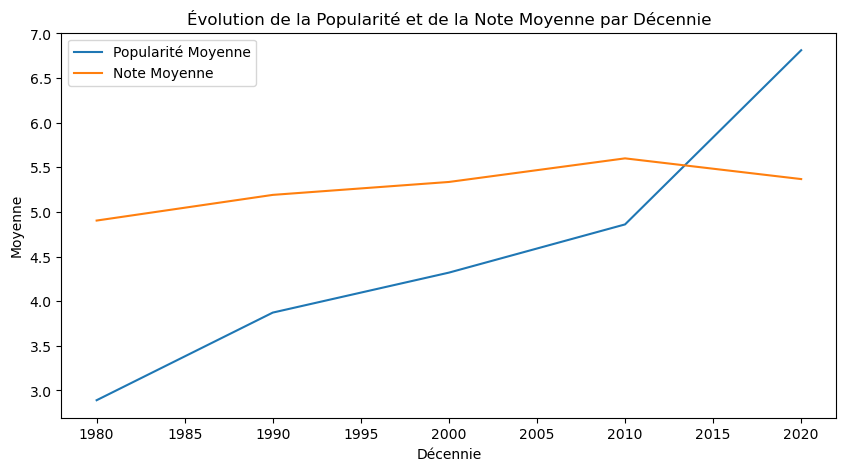

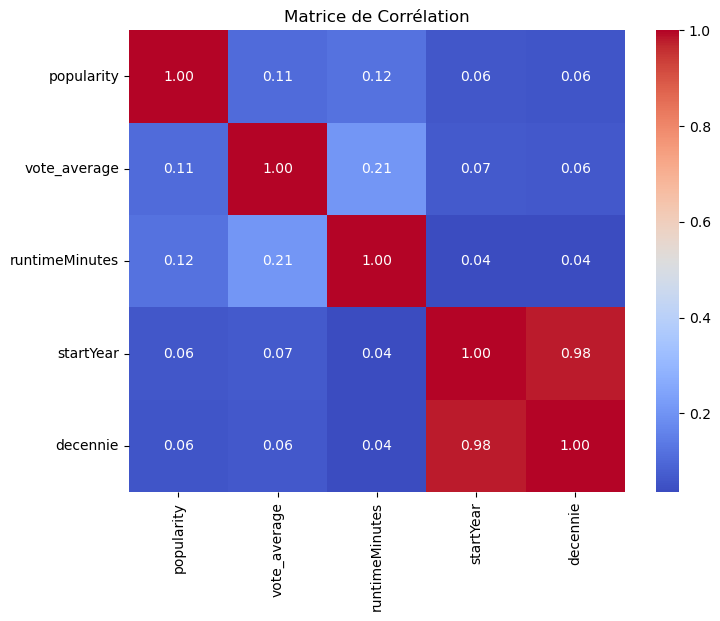

Coefficient de corrélation de Pearson entre Popularité et Note Moyenne : 0.106
P-value : 4.96e-29


In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import plotly.express as px

# Étape 1 : Histogrammes et boxplots
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# Vote Average
sns.histplot(df['vote_average'], bins=20, ax=axes[0,0], kde=True)
axes[0,0].set_title('Distribution des Notes Moyennes')

sns.boxplot(x=df['vote_average'], ax=axes[0,1])
axes[0,1].set_title('Boxplot Notes Moyennes')

# Runtime Minutes
sns.histplot(df['runtimeMinutes'], bins=30, ax=axes[1,0], kde=True)
axes[1,0].set_title('Distribution des Durées (minutes)')

sns.boxplot(x=df['runtimeMinutes'], ax=axes[1,1])
axes[1,1].set_title('Boxplot Durées')

plt.tight_layout()
plt.show()

# Étape 3 : Évolution par décennie
pop_by_decennie = df.groupby('decennie')['popularity'].mean()
vote_by_decennie = df.groupby('decennie')['vote_average'].mean()

plt.figure(figsize=(10,5))
pop_by_decennie.plot(label='Popularité Moyenne')
vote_by_decennie.plot(label='Note Moyenne')
plt.title('Évolution de la Popularité et de la Note Moyenne par Décennie')
plt.xlabel('Décennie')
plt.ylabel('Moyenne')
plt.legend()
plt.show()

# Étape 4 : Matrice de corrélation et heatmap
corr_matrix = df[['popularity', 'vote_average', 'runtimeMinutes', 'startYear', 'decennie']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de Corrélation')
plt.show()

# Étape 5 : Test de corrélation de Pearson entre popularité et vote_average
corr_coef, p_value = pearsonr(df['popularity'], df['vote_average'])
print(f"Coefficient de corrélation de Pearson entre Popularité et Note Moyenne : {corr_coef:.3f}")
print(f"P-value : {p_value:.3g}")

# Etapes 6 : Evolution dynamique du genre selon la décennie



In [41]:
# Supprimer les lignes avec valeurs manquantes dans les colonnes critiques
df = df.dropna(subset=['genres', 'decennie', 'popularity'])

# Fonction pour convertir uniquement les chaînes valides
def safe_literal_eval(val):
    try:
        result = ast.literal_eval(val)
        if isinstance(result, list):
            return result
        else:
            return None
    except:
        return None

# Appliquer la conversion sécurisée
df['genres'] = df['genres'].apply(safe_literal_eval)

# Supprimer les lignes où la conversion a échoué
df = df.dropna(subset=['genres'])

# Exploser les genres
df = df.explode('genres')

# Grouper par décennie et genre
grouped = df.groupby(['decennie', 'genres'])['popularity'].mean().reset_index()

# Créer le graphique
fig = px.line(
    grouped,
    x='decennie',
    y='popularity',
    color='genres',
    markers=True,
    title="Évolution de la popularité des genres de films par décennie",
    labels={
        'decennie': 'Décennie',
        'popularity': 'Popularité moyenne',
        'genres': 'Genre'
    }
)

fig.show()